In [133]:
def intfloat(d):
    try:
        return int(d)
    except ValueError:
        return float(d)

def readstat(slines):
    statname = slines[0]
    data = dict()
    for line in slines[1:]:
        values = line.split(',')
        rowname = values[0]
        #print values[1:]
        
        # for empty lines
        if values[1] == '' or values[1] == 'NA':
            values = []
        data[rowname] = [intfloat(el) for el in values[1:]]
    #print statname, '=\n', data
    return statname, data

# -- contains stat file information
nativedata = dict()
    
def parse_csv(csvfile):
    cf = open(csvfile, 'r')
    slines = []
    for line in cf:
        # handle empty case
        if line.strip() == '' and len(slines)==0:
            continue
        # empty line marks the end of a stat
        if line.strip() == '':
            statname, sdata = readstat(slines)
            nativedata[statname] = sdata
            slines = []
            continue
        slines.append(line.rstrip())
    cf.close()
        

In [154]:
parse_csv('CombineResults/write_singleByte_numIter1.csv')

In [159]:
"""
Bar chart demo with pairs of bars grouped for easy comparison.
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def barchart(df, statname, title, configs=['malloc','pmfs','tmpfs','ext4'], midx=8):
    """ Plot the statname for given configs
        this assumes df contains the whole data dict
        midx is the max index to plot for, setting this to 4 will plot
        for page size 1 to 64 only"""
    mydata = df[statname]
    colors = ['b', 'g', 'r', 'y']
    
    if 'Pages' in mydata.keys():   
        pages = mydata['Pages'][:midx]
    elif 'Prefetched Pages' in mydata.keys():
        pages = mydata['Prefetched Pages'][:midx]
        configs = ['pmfs']
    else:
        print "Unable to find metric to plot as X axis : ", title
        return
    
    n_groups = len(pages)   
    index = np.arange(n_groups)
    bar_width = 0.8 / len(configs)

    fig, ax = plt.subplots()
    opacity = 1.0
    #error_config = {'ecolor': '0.3'}

    i = 0
    for config in configs:
        datarow = mydata[config][:midx]
        if len(datarow) == 0:
            continue
        rects1 = plt.bar(index + i* bar_width,
                 datarow, bar_width,
                 alpha=opacity,
                 color=colors[i],
                 #yerr=std_men,
                 #error_kw=error_config,
                 label=config
                        )
        i = i + 1

    plt.xlabel('Number of Pages')
    plt.ylabel(statname)
    plt.title(title)
    plt.xticks(index + 0.4, pages)
    plt.legend(loc='upper left', ncol=2, fancybox=True)
    plt.tight_layout()
    #plt.savefig("Graphs/%s_%s.png"%(title,statname))
    plt.show()

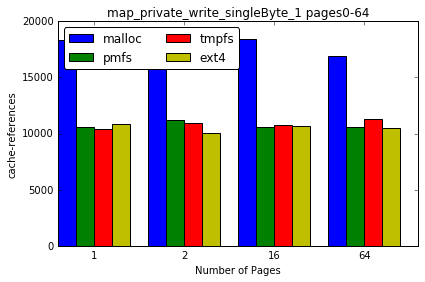

In [163]:
barchart(nativedata, 'cache-references', 'map_private_write_singleByte_1 pages0-64',midx=4)

In [158]:
nativedata['Time']

{'Pages': [1, 2, 16, 64, 256, 1024, 4192, 16768, 128000],
 'ext4': [27581, 28065, 29075, 2839, 8791, 70770, 222322, 776694, 5650834],
 'malloc': [149, 189, 210, 429, 1205, 4327, 16387, 52142, 369900],
 'pmfs': [304, 308, 326, 529, 1224, 3995, 15229, 45535, 305802],
 'tmpfs': [265, 268, 341, 435, 1032, 3167, 11842, 37767, 236773]}